In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'Sign-Language-Digits-Dataset/train'
valid_path = 'Sign-Language-Digits-Dataset/valid'
test_path = 'Sign-Language-Digits-Dataset/test'

In [3]:
# passes in batches of normalized data
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
mobile = keras.applications.mobilenet.MobileNet()

In [6]:
x = mobile.layers[-6].output
predictions = Dense(10, activation='softmax')(x)

In [7]:
# the new model, made from the original mobilenet, up to the 6th layer,
# and outputting 10 custom classes this time (from predictions line)
model = Model(inputs=mobile.input, outputs=predictions)

In [8]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [9]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit_generator(train_batches, steps_per_epoch=18, validation_data=valid_batches, validation_steps=3, epochs=60, verbose=2)

Epoch 1/60
 - 69s - loss: 2.0077 - acc: 0.3167 - val_loss: 2.1252 - val_acc: 0.2300
Epoch 2/60
 - 68s - loss: 1.4016 - acc: 0.5891 - val_loss: 1.9118 - val_acc: 0.3533
Epoch 3/60
 - 98s - loss: 0.9717 - acc: 0.6667 - val_loss: 1.7434 - val_acc: 0.4033
Epoch 4/60
 - 83s - loss: 0.7349 - acc: 0.7944 - val_loss: 1.5674 - val_acc: 0.4167
Epoch 5/60
 - 87s - loss: 0.6320 - acc: 0.8056 - val_loss: 1.4735 - val_acc: 0.4600
Epoch 6/60
 - 80s - loss: 0.5620 - acc: 0.8333 - val_loss: 1.4027 - val_acc: 0.4933
Epoch 7/60
 - 79s - loss: 0.5717 - acc: 0.8056 - val_loss: 1.3138 - val_acc: 0.5467
Epoch 8/60
 - 83s - loss: 0.4861 - acc: 0.8667 - val_loss: 1.2283 - val_acc: 0.5700
Epoch 9/60
 - 82s - loss: 0.3620 - acc: 0.9056 - val_loss: 1.1295 - val_acc: 0.5967
Epoch 10/60
 - 82s - loss: 0.2946 - acc: 0.9167 - val_loss: 1.1220 - val_acc: 0.6167
Epoch 11/60
 - 86s - loss: 0.2393 - acc: 0.9455 - val_loss: 1.0926 - val_acc: 0.6500
Epoch 12/60
 - 93s - loss: 0.2212 - acc: 0.9611 - val_loss: 1.0445 - val_a

In [11]:
# predict sign language digits

In [12]:
test_labels = test_batches.classes  # can get do this, it's a ImageGenerator object

In [13]:
predictions = model.predict_generator(test_batches, steps=5, verbose=0)

In [14]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [15]:
test_batches.class_indices  # lets you see the predictions in the chronological order

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 1 4 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [1 0 0 0 0 0 3 1 0 0]
 [1 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 1 4 0]
 [0 0 0 0 0 0 0 0 0 5]]


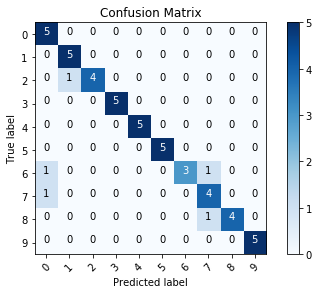

In [16]:
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')